# All imports

In [1]:
import numpy as np
import networkx as nx
import math
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Utils

In [2]:
def draw(G,**kwargs):
    if len(G)<20:
        nx.draw_spring(G,
                       node_size=400,
                       with_labels=True)
    else:
        nx.draw_spring(G,
                       node_size=10,
                       with_labels=False)       

In [3]:
def create_undirected_graph(edges):
    G=nx.Graph()
    G.add_edges_from(edges)
    return G

In [4]:
def create_directed_graph(edges):
    DG=nx.DiGraph()
    DG.add_edges_from(edges)
    return DG

In [5]:
def load_graph_from_tsv(file):
    f = open(file,"r")
    text = f.readlines()
    clean = lambda x:x.strip("\n").split(" ")
    node_pairs = list(map(clean,text[2:]))
    node_pairs = [(int(x[0]),int(x[1])) for x in node_pairs]
    node_pairs[:4]
    G = nx.Graph()
    G.add_edges_from(node_pairs)
    return G

# IV.5
Take  an  undirected  network  and  measure  the  correlation  between  different
centrality measures.  The correlation can either be estimated with the centrality values (Spearman) or with their
associated ranking (Kendall). Construct an example of a graph where one node has a small degree centrality
but a high betweenness centrality.

Given 2 random variables (or sets of observation) $X$ and $Y$, we have

**Pearson Correlation:** $\frac{\mathrm{Cov}(X,Y)}{\sigma(X)\sigma(Y)}$

**Kendall Correlation:** After ordering the observation pairs, use $\frac{(number.of.concordant.pairs)-(number.of.discordant.pairs)}{\frac{1}{2}{n(n-1)}}$

**Spearman Correlation:** Pearson correlation after mapping the observations $X_i$, $Y_i$ to their ranks.

In [6]:
def build_centrality_measures_dataframe(G):
    
    # Builds dictionaries with the different metrics
    betweenness = nx.betweenness_centrality(G)
    degree = dict(nx.degree(G))
    closeness = nx.closeness_centrality(G)
    katz = nx.katz_centrality(G)
    pagerank = nx.pagerank(G,alpha=0.5) # The $ \alpha=.85 $ was chosen randomly. Is there a better approach?
    
    # Builds a dataframe with the measures as columns and the nodes as rows
    df = pd.DataFrame({'betweenness':betweenness,
                       'degree':degree,
                       'closeness':closeness,
                       'katz':katz,
                       'pagerank':pagerank})
    return df

# Requires the centrality_measures_dataframe as input
def correlation_of_centrality_metrics(df):
    # Builds correlation matrices for the different metrics
    for metric in ['pearson', 'kendall', 'spearman']:
        print("\n\n" + str(metric.capitalize()) + ' correlation:')
        print(df.corr(metric))

**Dataset used:** The propo dataset used consists of nodes representing proteins and edges representing pairs of interacting proteins.

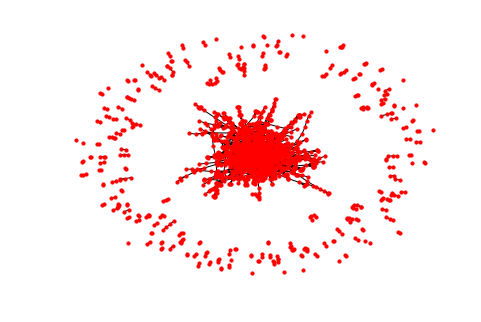

In [7]:
G = load_graph_from_tsv("datasets/propo.tsv")
draw(G)

In [8]:
df = build_centrality_measures_dataframe(G)
df.describe()

,betweenness,closeness,degree,katz,pagerank
count,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000
mean,0.001891,0.091932,2.435294,0.020112,0.000535
std,0.006035,0.051226,3.164618,0.011416,0.000374
min,0.000000,0.000000,1.000000,0.013533,0.000313
25%,0.000000,0.080883,1.000000,0.014203,0.000362
50%,0.000000,0.112335,1.000000,0.016208,0.000446
75%,0.001219,0.126392,3.000000,0.021312,0.000548
max,0.129420,0.183020,56.000000,0.200559,0.009283


In [9]:
correlation_of_centrality_metrics(df)



Pearson correlation:
             betweenness  closeness    degree      katz  pagerank
betweenness     1.000000   0.297399  0.837694  0.818457  0.739478
closeness       0.297399   1.000000  0.302620  0.456009  0.090823
degree          0.837694   0.302620  1.000000  0.868335  0.929309
katz            0.818457   0.456009  0.868335  1.000000  0.726429
pagerank        0.739478   0.090823  0.929309  0.726429  1.000000


Kendall correlation:
             betweenness  closeness    degree      katz  pagerank
betweenness     1.000000   0.409058  0.813356  0.548139  0.548832
closeness       0.409058   1.000000  0.359753  0.713957 -0.081977
degree          0.813356   0.359753  1.000000  0.569681  0.638604
katz            0.548139   0.713957  0.569681  1.000000  0.064198
pagerank        0.548832  -0.081977  0.638604  0.064198  1.000000


Spearman correlation:
             betweenness  closeness    degree      katz  pagerank
betweenness     1.000000   0.523995  0.897253  0.676930  0.699047
closen

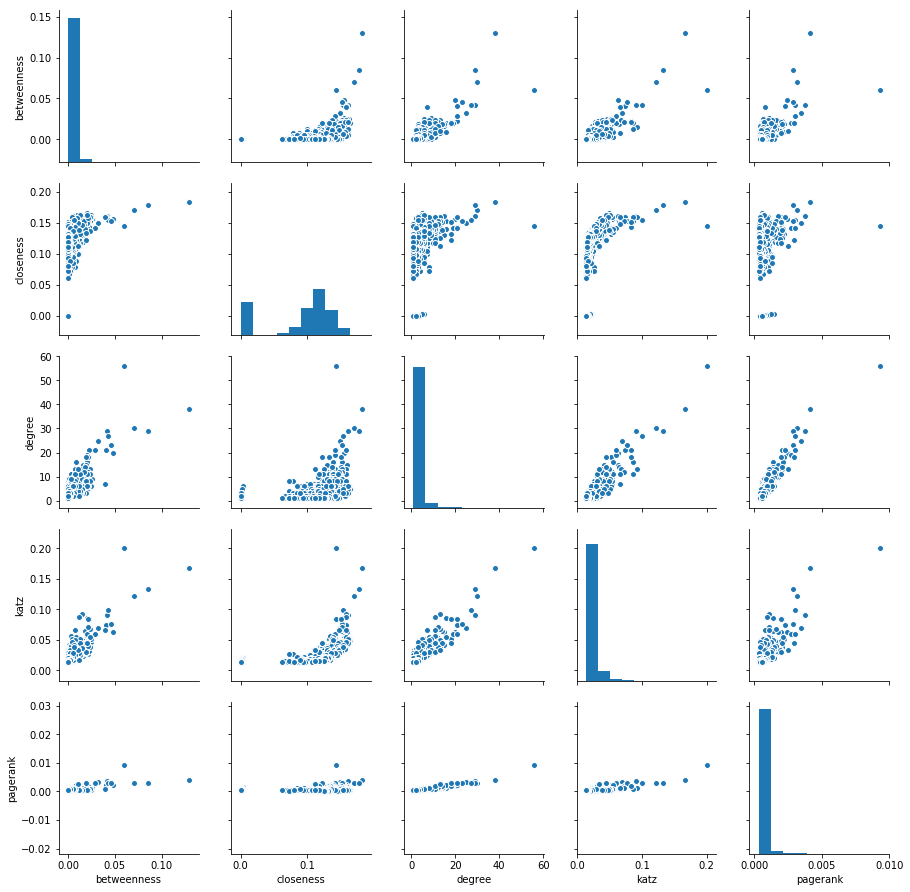

In [10]:
# Pairplots comparing the different metrics
sns.pairplot(df)